<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/Lec_6/Keras_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import requests
import io

## Farsi Hand-written digits classification

In [0]:
'''
Let's import the Farsi digits (your assignment)
'''

url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Assignments/A3/X.npz'
s=requests.get(url, stream=True).content
X = np.load(io.BytesIO(s) )['arr_0']
url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Assignments/A3/Y.npz'
s=requests.get(url, stream=True).content
Y = np.load(io.BytesIO(s) )['arr_0']

from sklearn.utils import shuffle
X, Y = shuffle(X,Y, random_state = 0 )

In [0]:
print('Each image is of the form: {}'.format(X[0].shape ) )

Each image is of the form: (32, 32)


In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [0]:
history = model.fit(X_train,Y_train, validation_split=0.25, epochs=5)

Train on 57573 samples, validate on 19191 samples
Epoch 1/5
57573/57573 [==============================] - 8s 136us/sample - loss: 0.1531 - acc: 0.9560 - val_loss: 0.0846 - val_acc: 0.9751
Epoch 2/5
57573/57573 [==============================] - 8s 132us/sample - loss: 0.0569 - acc: 0.9834 - val_loss: 0.0802 - val_acc: 0.9759
Epoch 3/5
57573/57573 [==============================] - 9s 148us/sample - loss: 0.0355 - acc: 0.9886 - val_loss: 0.0586 - val_acc: 0.9814
Epoch 4/5
57573/57573 [==============================] - 7s 128us/sample - loss: 0.0236 - acc: 0.9927 - val_loss: 0.0536 - val_acc: 0.9843
Epoch 5/5
57573/57573 [==============================] - 7s 128us/sample - loss: 0.0152 - acc: 0.9955 - val_loss: 0.0605 - val_acc: 0.9831


In [0]:
Y_predicted = np.argmax( model.predict(X_test) , axis=1 )
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)

[[2518    0    0    2    1   14    0    0    1    0]
 [   0 2503    4    0    1    0    1    0    1    1]
 [   1    7 2406   59   19    0    7    1    0    0]
 [   0    0   30 2493   19    1    0    0    0    1]
 [   0    4    6   45 2620    8    4    2    2    1]
 [   6    2    0    4    2 2471    2    0    6    4]
 [   0    1    4    1    2    0 2591    1    3    5]
 [   3    3    6    3    3    3   15 2572    0    0]
 [   0    4    0    0    0    1    2    0 2534    7]
 [   0    8    1    1    6    0   33    0   10 2485]]


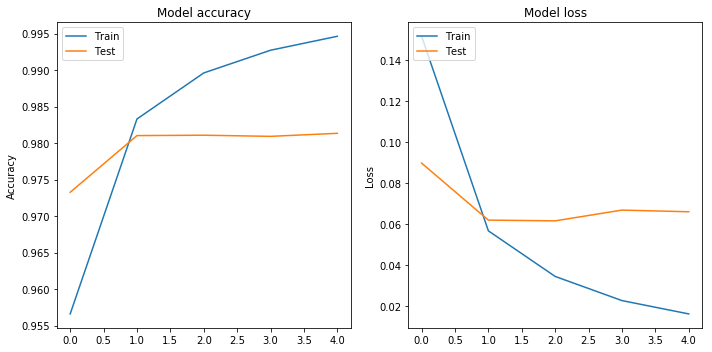

In [0]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [0]:
Y_oh = keras.utils.to_categorical(Y, num_classes=10, dtype=int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_oh, random_state=0)


## We need to change the loss function for the one-hot encoding
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(X_train,Y_train, validation_split=0.25, epochs=10, batch_size=16, verbose=1)

In [0]:
Y_predicted = np.argmax( model.predict(X_test) , axis=1 )
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)

In [0]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

## Try this for the particle identification problem.

In [2]:
import pandas as pd
url = 'https://www.dropbox.com/s/66dbhxl93y41coe/particle-identification-from-detector-responses.zip?dl=1'
s=requests.get(url, stream=True).content
data=pd.read_csv(io.BytesIO(s) , compression='zip' )
 
'''
Alternatively, you can download the file into your computer and run the following code. 
You need to uncomment it first. 
'''    

# data = pd.read_csv('particle-identification-from-detector-responses.zip', compression='zip')
data.head()

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256


In [3]:
n_s = len(data)
targets = list(set(data['id']))
mini_data = data.sample(n_s, axis=0, random_state=0)
mini_data['target'] = mini_data['id'].apply(lambda x: targets.index(x)) 
mini_data.drop('id',axis=1, inplace=True)
mini_data.head()

,p,theta,beta,nphe,ein,eout,target
3748577,1.230330,0.415613,0.985857,0,0.182147,0.058503,1
4555504,0.870680,0.864884,0.989180,0,0.000000,0.000000,1
2388454,1.320670,0.481086,0.806984,0,0.151431,0.115267,2
3738046,0.657969,0.500238,0.982778,0,0.034974,0.055161,1
1572731,1.756310,0.340558,0.993275,0,0.030030,0.167452,1


In [0]:
Y = mini_data['target'].values
ind_to_keep = ['p', 'beta']
X = mini_data[ind_to_keep].values

In [11]:
model = keras.Sequential()
model = keras.Sequential([
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(4, activation=tf.nn.softmax)
])


model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.build([None, 2])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             multiple                  384       
_________________________________________________________________
dense_17 (Dense)             multiple                  16512     
_________________________________________________________________
dense_18 (Dense)             multiple                  16512     
_________________________________________________________________
dense_19 (Dense)             multiple                  516       
Total params: 33,924
Trainable params: 33,924
Non-trainable params: 0
_________________________________________________________________


In [0]:
Y_oh = keras.utils.to_categorical(Y, num_classes=4, dtype=int)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_oh, random_state=0)

In [13]:
Y_train.shape

(3750000, 4)

In [14]:
history = model.fit(X_train,Y_train, validation_split=0.05, epochs=10 , batch_size=256, verbose=1)

Train on 3562500 samples, validate on 187500 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
3562500/3562500 [==============================] - 67s 19us/sample - loss: 0.1130 - acc: 0.9619 - val_loss: 0.1723 - val_acc: 0.9424
Epoch 2/20
3562500/3562500 [==============================] - 65s 18us/sample - loss: 0.0954 - acc: 0.9671 - val_loss: 0.0978 - val_acc: 0.9667
Epoch 3/20
3562500/3562500 [==============================] - 66s 19us/sample - loss: 0.0934 - acc: 0.9675 - val_loss: 0.0913 - val_acc: 0.9680
Epoch 4/20
3562500/3562500 [==============================] - 65s 18us/sample - loss: 0.0927 - acc: 0.9678 - val_loss: 0.0907 - val_acc: 0.9691
Epoch 5/20
3562500/3562500 [==============================] - 64s 18us/sample - loss: 0.0921 - acc: 0.9679 - val_loss: 0.0879 - val_acc: 0.9694
Epoch 6/20
3562500/3562500 [==============================] - 66s 18us/sample - loss: 0.0918 - acc: 0.9680 - val_loss: 0.0982 - val_acc: 0.9648
Epoch 7/20
3562500/3562500 [=======

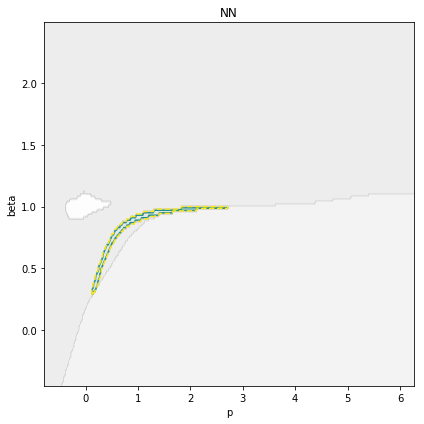

In [27]:
X0, X1 = X[:, 0], X[:, 1]
h=.02
x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max , h), np.arange(y_min, y_max , h) )

fig = plt.figure(figsize=(6,6))
# for clf in list(clf_dict.keys())[:]:
#     print(list(clf_dict.keys()).index(clf))
#     ax = plt.subplot(1, len(degrees), i + 1, xlabel=x_label, ylabel=y_label, title=plt_title)
ax = fig.add_subplot(1, 1, 1 , xlabel = ind_to_keep[0], ylabel=ind_to_keep[1], title = 'NN')

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
# print(np.shape(np.c_[xx.ravel(), yy.ravel()]))
# print(Z.shape)
# print(xx.shape)
# print(yy.shape)
Z = Z.reshape(xx.shape)
# ax.scatter(X[:,0],X[:,1],c=Y, cmap=plt.cm.plasma, s=20)
ax.contour(xx, yy, Z,  levels=[-.5, 0, .5], linestyles=['--', '-', '--'])
ax.contourf(xx, yy, Z, alpha= .1, cmap = plt.cm.gray)
    
plt.tight_layout()
plt.show()

# Learning rate:
Change the learning rate and plot the results for 

eta = .01, .03, .1, .3, 1

For each one, do 5 runs (5 epoch should be enough. )

Plot and compare them. 

Track the time and report the average learning time for each value of eta. 

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

import time

In [38]:
exc_time = []
histories = []
eta_list = [.01, .03, .1, .3 , 1]
for eta in eta_list:
  model.reset_metrics()
  optimizer = keras.optimizers.Adam(lr=eta)
  model.optimizer = optimizer
  
  start = time.time()
  h = model.fit(X_train,Y_train, validation_split=0.25, epochs=10,batch_size=64, verbose=0)
  stop = time.time()
  print(stop-start)
  exc_time += [stop-start]
  
  histories +=[h]
  

40.65576720237732
39.18314528465271
39.714462995529175
39.16478157043457
38.57382893562317


In [0]:
eta_list = [.01, .03, .1, .3 , 1]


In [36]:
print(exc_time)

[20.144747495651245, 19.881685256958008]


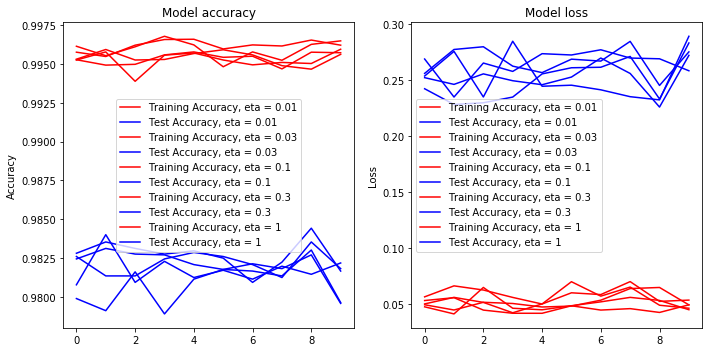

In [42]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
for i in range(5):
  ax.plot(histories[i].history['acc'], color='r', label= 'Training Accuracy, eta = {}'.format(eta_list[i] ) )
  ax.plot(histories[i].history['val_acc'], color='b', label= 'Test Accuracy, eta = {}'.format(eta_list[i] ) )
plt.legend(loc=0)

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')

for i in range(5):
  ax.plot(histories[i].history['loss'], color='r', label= 'Training Accuracy, eta = {}'.format(eta_list[i] ) )
  ax.plot(histories[i].history['val_loss'], color='b', label= 'Test Accuracy, eta = {}'.format(eta_list[i] ) )
plt.legend(loc=0)


plt.tight_layout()
plt.show()

# Batch size

Change the Batch_size and plot the results for 

Batch_size = 8, 32, 128, 512, 1024 (change n_epochs too. )

eta =  .03, .1, .3

For each one, do 5 runs (5 epoch should be enough. )

Plot and compare them. 

Track the time and report the average learning time for each value of eta. 

# Optimization techniques

For a fixed batch_size (pick the best from last section) try the three different algorithms that we discussed. Look at 

https://keras.io/optimizers/

for the possible optimizers. 

Try 

eta = .03, .1, .3

For each one, do 5 runs (5 epoch should be enough. )

Plot and compare them. 

Track the time and report the average learning time for each value of eta. 

## Overfitting

Here we include some dropout and some regularization in our model to overcome overfitting.

In [0]:
model = keras.Sequential()
model = keras.Sequential([
    keras.layers.Dense(128,activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.001) ),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(4, activation=tf.nn.softmax)
])


model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.build([None, 2])
model.summary()